# Aprendizaje supervisado - entrenamiento de modelos de machine learning

## Importación de librerías

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos

In [6]:
data = pd.read_csv("data_encoded.csv")

In [7]:
data.head()

,age,gender,education_level,marital_status,credit_score,loan_status,new_occupation,new_income
0,32,1,1,0,720,1,4,4
1,45,0,4,1,680,1,3,3
2,28,1,3,1,590,0,3,1
3,51,0,1,0,780,1,0,0
4,36,1,1,0,710,1,0,3


## Entrenamiento del modelo

Un modelo, no es mas que una función **f(x) = y** representando **x** a las variables independientes (features) que explican como calcular la variable objetivo a predecir **y**

### División entre Train y Test 

Un modelo aprende de un conjunto de datos de entrenamiento, sobre los patrones determinantes para diferenciar una clase de la otra. Luego, en la etapa de la predicción si se presentan esos mismos patrones, se otorga el mismo target que se observó en la etapa anterior. 

Generalmente se utiliza un 20% de los datos para evaluar el modelo.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle=True)

In [15]:
x_train.shape

(48, 7)

In [16]:
x_test.shape

(13, 7)

### Escalado de los datos

Cuando tenemos variables que se mueven en diferentes escalas, algunos modelos necesitan escalar los datos previamente, para evitar que el modelo erróneamente aprenda que una variable determinada (la de mayor escala) tiene más importancia en la explicación de la variable a predecir, con respecto a las otras.

Existen diferentes formas de escalar los datos:

- Standard Scaler: z = (x - u) / s , siendo u la media de los datos utilizados para entrenar, y s la desviación estandar.
- MinMaxScaler: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)), siendo X.min el valor mínimo para esa característica y X.max el máximo.
- MaxAbsScaler: Xscaled= X/max(x), siendo x cada característica. 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_train[:10]

array([[-0.87549217, -0.8819171 ,  1.44069218,  1.29099445, -0.63364597,
        -0.54301184, -0.09381827],
       [ 1.18925237, -0.8819171 , -0.04647394, -0.77459667,  1.31961133,
         0.3769141 , -1.38046886],
       [-1.11840329, -0.8819171 , -1.53364006,  1.29099445, -0.77316435,
         0.3769141 , -0.09381827],
       [-1.23985886, -0.8819171 , -0.790057  ,  1.29099445, -1.61027462,
        -0.84965381, -0.73714357],
       [-0.99694773, -0.8819171 , -0.790057  ,  1.29099445, -1.33123786,
        -0.84965381, -0.73714357],
       [ 0.82488569,  1.13389342,  1.44069218, -0.77459667,  0.62201944,
        -1.15629579,  1.19283231],
       [-0.63258105,  1.13389342, -0.790057  , -0.77459667,  0.9010562 ,
         0.68355608,  1.19283231],
       [-0.99694773, -0.8819171 , -0.790057  ,  1.29099445, -1.05220111,
        -1.15629579, -0.09381827],
       [ 1.43216349, -0.8819171 , -0.790057  , -0.77459667,  0.06394592,
        -1.46293777,  0.54950702],
       [ 0.94634125,  1.1338

### Entrenamiento : Árbol de decisión

Un árbol de decisión trabaja aplicando particiones o puntos de corte en las variables explicativas (x), de forma tal que se prediga de mejor forma la variable respuesta (y).

Utiliza el concepto de entropía: cantidad de aleatoriedad en los datos, la cual se busca reducir. Por lo tanto, se realizan particiones hasta llegar a la menor entropía, es decir lograr una homogeneidad alta en las muestras de los nodos.  

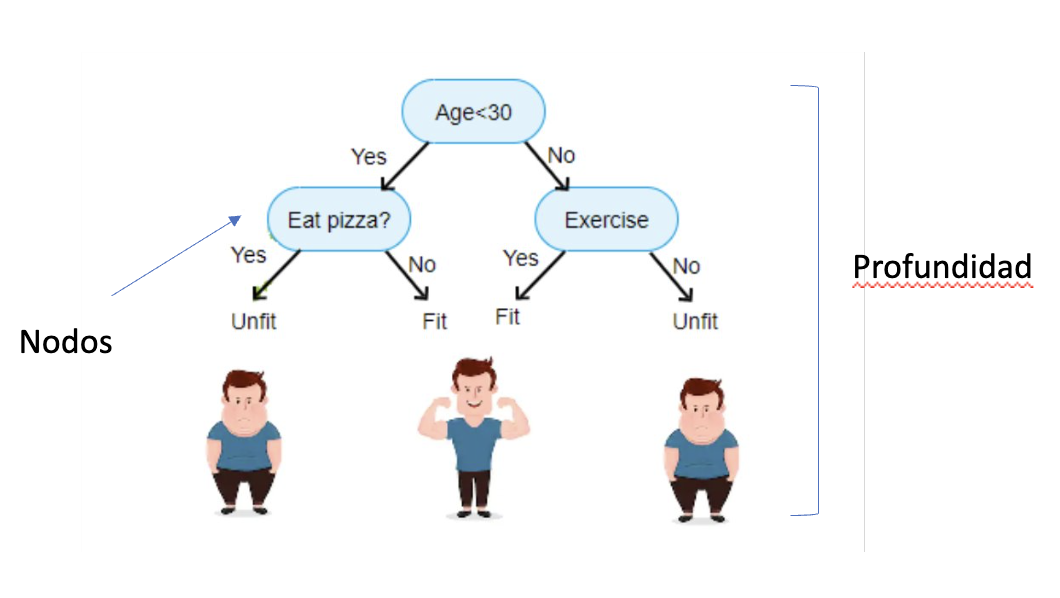

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=5)

In [25]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Evaluación en modelos de clasificación

**Confusion Matrix**

| Real /Predicted | Negative | Positive |
| --- | --- | --- |
| Negative | True Negative | False Positive |
| Positive | False Negative | True Positive |

- Verdadero Positivo - TP (acierto): la clase real es Positivo y el modelo predice Positivo.

- Verderado Negativo - TN (acierto): la clase real es Negativo y el modelo predice Negativo.

- Falso Positivo - FP(error): la clase real es Negativo y el modelo predice Positivo.

- Falso Negativo – FN (error): la clase real es Positivo y el modelo predice Negativo.


**Accuracy**
Mide que tan bueno es en general el modelo para identificar las clases. No es una buena medida cuando las clases estan desbalanceadas. 

\begin{align}
\ Accuracy = \ \frac{True Positive + True Negative}{(True Positive + True Negative + False Negative + False Positive)} \\
\end{align}

**Precision**
Que tan preciso o exacto es su modelo en la predicción de los positivos predichos, cuantos de ellos son positivos reales. La precisión es una buena medida para determinar cuando los costos de falsos positivos son altos, es decir aquellas observaciones que siendo negativas, el modelo las predice como de la clase positiva.
Este es el llamado Error tipo 1, predijiste positivo y esto es falso. 

\begin{align}
\ Precision = \ \frac{True Positive}{(True Positive + False Positive)} \\
\end{align}

**Recall**
Calcula cuántos de los positivos reales captura nuestro modelo etiquetándolo como positivos. Esta métrica es buena cuando existe un alto costo asociado con el Falso Negativo, es decir aquellas observaciones que siendo positivas, el modelo las predice como de la clase negativa. 
Este es el llamado Error tipo 2, predijiste negativo y esto es falso. 

\begin{align}
\ Recall = \ \frac{True Positive}{(True Positive + False Negative)} \\
\end{align}

**F1-Score**
Esta métrica es necesaria cuando desea buscar un equilibrio entre precisión y recall, y si hay una distribución de clase desigual (gran cantidad de Negativos reales).

\begin{align}
\ F1 = 2 * \ \frac{Precision * Recall}{(Precision + Recall)} \\
\end{align}

**AUC-ROC-Curve**
ROC es una curva de probabilidad y AUC representa el grado o medida de separabilidad. Indica cuánto es capaz el modelo de distinguir entre clases. Cuanto mayor sea el AUC, mejor será el modelo para predecir las clases.

True Positive Rate / Recall /Sensitivity

\begin{align}
\ \frac{True Positive}{(True Positive + False Negative)} \\
\end{align}

True Negative Rate, Specifity: 

\begin{align}
\ \frac{True Negative}{(True Negative + False Positive)} \\
\end{align}

El indicador más utilizado en muchos contextos es el área bajo la curva ROC o AUC. Este índice se puede interpretar como la probabilidad de que un clasificador ordenará o puntuará una instancia positiva elegida aleatoriamente más alta que una negativa.


In [28]:
# Predict
y_train_pred = clf.predict(x_train)

In [29]:
x_test = scaler.transform(x_test)

In [30]:
y_test_pred = clf.predict(x_test)

In [31]:
from sklearn import metrics
from sklearn import metrics

In [32]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [33]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_test, y_test_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.90      0.95        10

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



<Figure size 640x480 with 0 Axes>

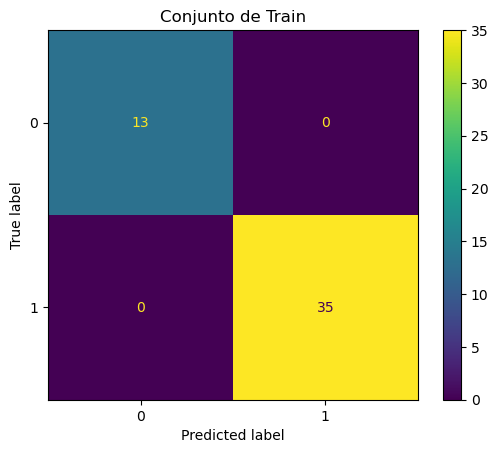

In [34]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.title('Conjunto de Train')
plt.show()

<Figure size 640x480 with 0 Axes>

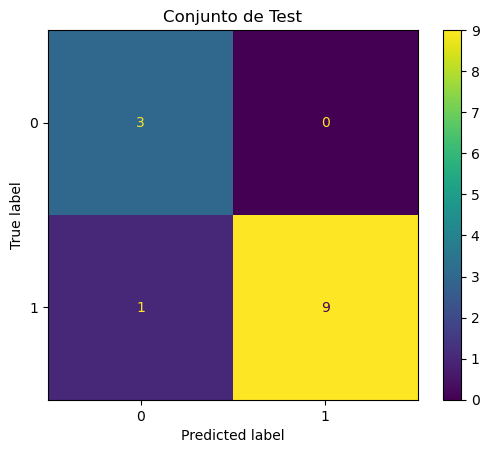

In [35]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.title('Conjunto de Test')
plt.show()